MAPA: TOTAL DE MUJERES (SHARE BY DISTRICT)

In [5]:
import geopandas as gpd
from zipfile import ZipFile
from pathlib import Path
import pandas as pd
from numpy import inf as inf
import seaborn as sns

%matplotlib inline

In [6]:
# raw data
zipped_files_path = Path("C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/Censo_2007")




In [7]:
zipped_files = list(zipped_files_path.glob("*.zip"))

zipped_files

[WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/Censo_2007/female_population.zip'),
 WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/Censo_2007/provincias.zip')]

In [8]:
csv_zipped = ZipFile(zipped_files[0]) 
shape_zipped = ZipFile(zipped_files[1])


In [9]:
extrafiles_path = Path("C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/Censo_2007/interim/extracted/")
extrafiles_path

WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/Censo_2007/interim/extracted')

In [10]:
csv_zipped.extractall(extrafiles_path / 'csv_files')
shape_zipped.extractall(extrafiles_path / 'shape_files')

In [11]:
shape_extracted_dir = extrafiles_path / 'shape_files'
shape_extracted_dir

csv_extracted_dir = extrafiles_path / 'csv_files'
csv_extracted_dir


WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/Censo_2007/interim/extracted/csv_files')

In [12]:
!dir - shape_extracted_dir


 El volumen de la unidad C es Windows-SSD
 El número de serie del volumen es: C23F-BB8A

 Directorio de C:\Users\Fiorella


 Directorio de C:\Users\Fiorella

21/08/2022  22:47               128 shape_extracted_dir
               1 archivos            128 bytes
               0 dirs  274,001,903,616 bytes libres


In [13]:
#from realpython.com (https://realpython.com/python-pathlib/#display-a-directory-tree)
def tree(directory):
    print(f'+ {directory}')
    for path in sorted(directory.rglob('*')):
        depth = len(path.relative_to(directory).parts)
        spacer = '    ' * depth
        print(f'{spacer}+ {path.name}')

In [14]:
tree(shape_extracted_dir)

+ C:\Users\Fiorella\OneDrive - UDEP\TIE1\Bases de datos\05_dataviz\pregnant\Censo_2007\interim\extracted\shape_files
    + provincias
        + provincias.zip


In [15]:
ZipFile(shape_extracted_dir / 'provincias' / 'provincias.zip').extractall(extrafiles_path / 'provincias_shape')

In [16]:
shape_extracted_dir

WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/Censo_2007/interim/extracted/shape_files')

In [17]:
tree(extrafiles_path)

+ C:\Users\Fiorella\OneDrive - UDEP\TIE1\Bases de datos\05_dataviz\pregnant\Censo_2007\interim\extracted
    + csv_files
        + female_population
            + earlypreg_provin.csv
    + provincias_shape
        + provincias
            + PROVINCIAS.cpg
            + PROVINCIAS.dbf
            + PROVINCIAS.prj
            + PROVINCIAS.shp
            + PROVINCIAS.shp.xml
            + PROVINCIAS.shx
    + shape_files
        + provincias
            + provincias.zip


In [18]:
extrafiles_path

WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/Censo_2007/interim/extracted')

In [19]:
geo_data = gpd.read_file(extrafiles_path / 'provincias_shape'/ 'provincias' / 'PROVINCIAS.shp')

geo_data


,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943..."
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510..."
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140..."
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904..."
...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412..."
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411..."
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."


<AxesSubplot:>

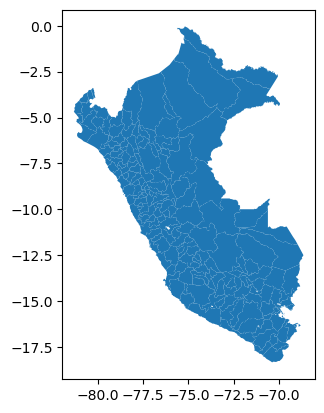

In [20]:
geo_data.plot()

In [21]:
display (geo_data)
%whos

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943..."
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510..."
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140..."
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904..."
...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412..."
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411..."
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."


Variable              Type            Data/Info
-----------------------------------------------
Path                  type            <class 'pathlib.Path'>
ZipFile               type            <class 'zipfile.ZipFile'>
csv_extracted_dir     WindowsPath     C:\Users\Fiorella\OneDriv<...>terim\extracted\csv_files
csv_zipped            ZipFile         <zipfile.ZipFile filename<...>population.zip' mode='r'>
extrafiles_path       WindowsPath     C:\Users\Fiorella\OneDriv<...>so_2007\interim\extracted
geo_data              GeoDataFrame        IDDPTO DEPARTAMEN IDP<...>n\n[196 rows x 7 columns]
gpd                   module          <module 'geopandas' from <...>\geopandas\\__init__.py'>
inf                   float           inf
np                    module          <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                    module          <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
shape_extracted_dir   WindowsPath     C:\Users\Fiorella\OneDriv<...>rim\extract

In [22]:
extrafiles_path

WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/Censo_2007/interim/extracted')

In [23]:
population_data = pd.read_csv( extrafiles_path / 'csv_files' / 'female_population' / 'earlypreg_provin.csv',  delimiter = '\t', dtype={"IDPROV":"string"})





population_data.head()






,IDPROV,TOTAL,POPULATION
0,0101,313.0,2421.0
1,0102,727.0,3533.0
2,0103,238.0,1350.0
3,0104,783.0,2324.0
4,0105,378.0,2052.0


In [24]:
common_cols = [col for col in population_data.columns if col in geo_data.columns]

common_cols


['IDPROV']

In [25]:
population_data

,IDPROV,TOTAL,POPULATION
0,0101,313.0,2421.0
1,0102,727.0,3533.0
2,0103,238.0,1350.0
3,0104,783.0,2324.0
4,0105,378.0,2052.0
...,...,...,...
1043863,<NA>,NaN,NaN
1043864,<NA>,NaN,NaN
1043865,<NA>,NaN,NaN
1043866,<NA>,NaN,NaN


In [26]:
merged_data = geo_data.merge(population_data, on = 'IDPROV')
merged_data

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry,TOTAL,POPULATION
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",313.0,2421.0
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",727.0,3533.0
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",238.0,1350.0
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",783.0,2324.0
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",378.0,2052.0
...,...,...,...,...,...,...,...,...,...
190,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...",349.0,2051.0
191,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",3755.0,18962.0
192,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...",902.0,2376.0
193,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...",680.0,2511.0


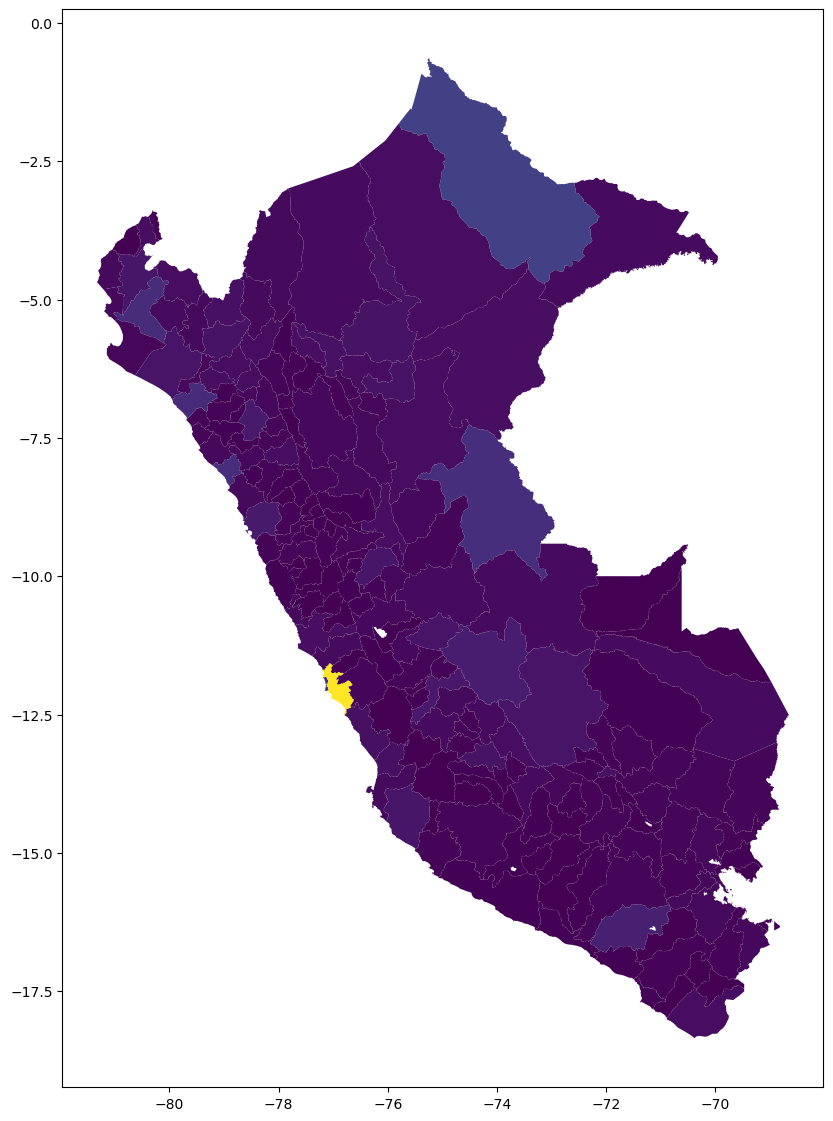

In [27]:
merged_data.plot(column = 'TOTAL', figsize = (14,14));

In [28]:
#We can then get B.A. share by dividing AH04E022 / AH04E001
#And B.A.+ share by dividing AH04E022 + AH04E023 + AH04E024 + AH04E025 / AH04E001

merged_data['W_share'] = (merged_data['TOTAL']) / merged_data['POPULATION']




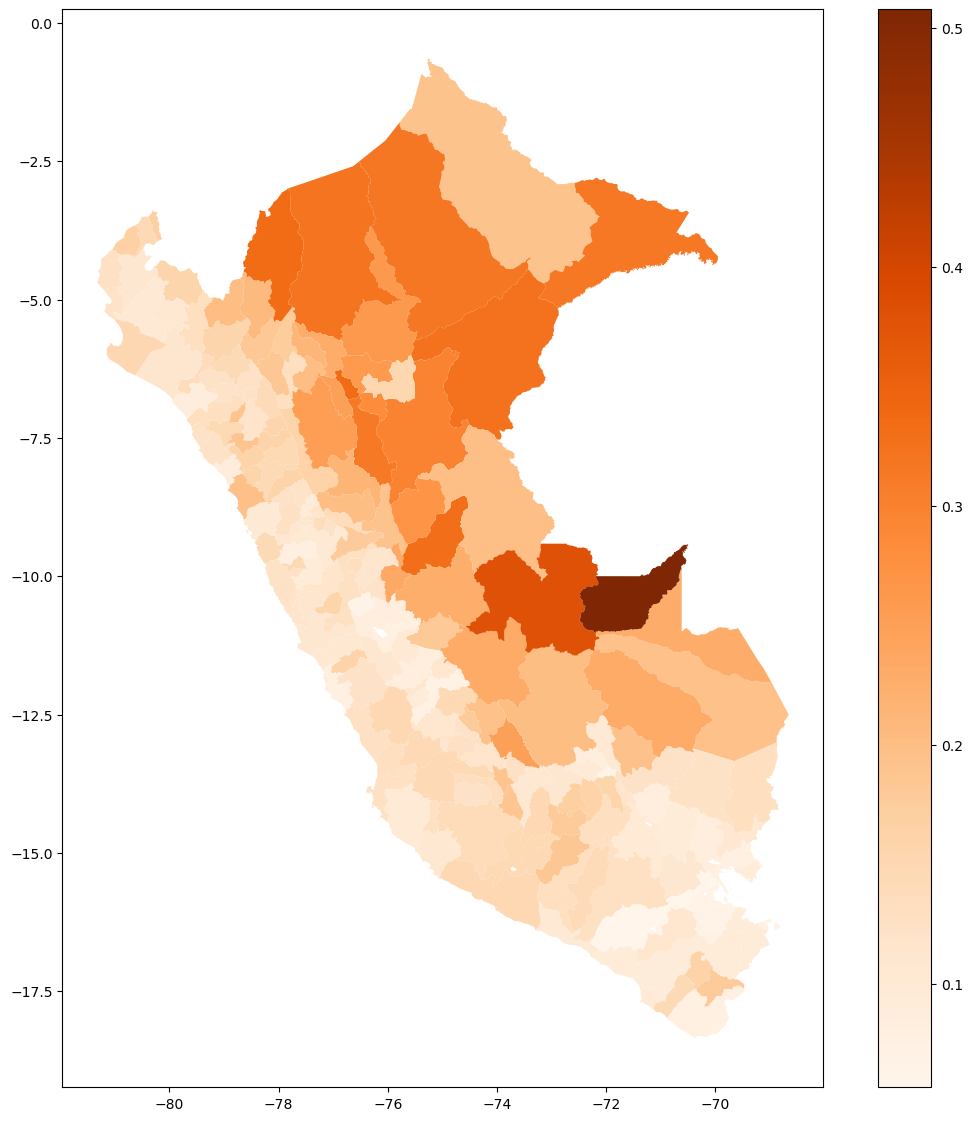

In [29]:
merged_data.plot(column = 'W_share', figsize = (14,14), legend = True, cmap = 'Oranges');

In [30]:
for col in merged_data.columns:
    print(col)

IDDPTO
DEPARTAMEN
IDPROV
PROVINCIA
CAPITAL
FUENTE
geometry
TOTAL
POPULATION
W_share


In [31]:
subset = merged_data[['PROVINCIA', 'W_share', 'geometry']]

In [32]:
import geoplot.crs as gcrs
import geoplot
import matplotlib.pyplot as plt
from pyproj import CRS

In [33]:
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:3857")
transformer.transform(12, 12)

(1335833.8895192828, 1345708.4084091089)

In [34]:
CRS = {"init": "epsg:3857"}

subset_4326 = subset.to_crs(epsg = 4326)

subset_4326









,PROVINCIA,W_share,geometry
0,CHACHAPOYAS,0.129285,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943..."
1,BAGUA,0.205774,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510..."
2,BONGARA,0.176296,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140..."
3,CONDORCANQUI,0.336919,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
4,LUYA,0.184211,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904..."
...,...,...,...
190,ZARUMILLA,0.170161,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412..."
191,CORONEL PORTILLO,0.198028,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
192,ATALAYA,0.379630,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411..."
193,PADRE ABAD,0.270808,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."


C:\Users\Fiorella\AppData\Local\Temp\ipykernel_2092\1543905156.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


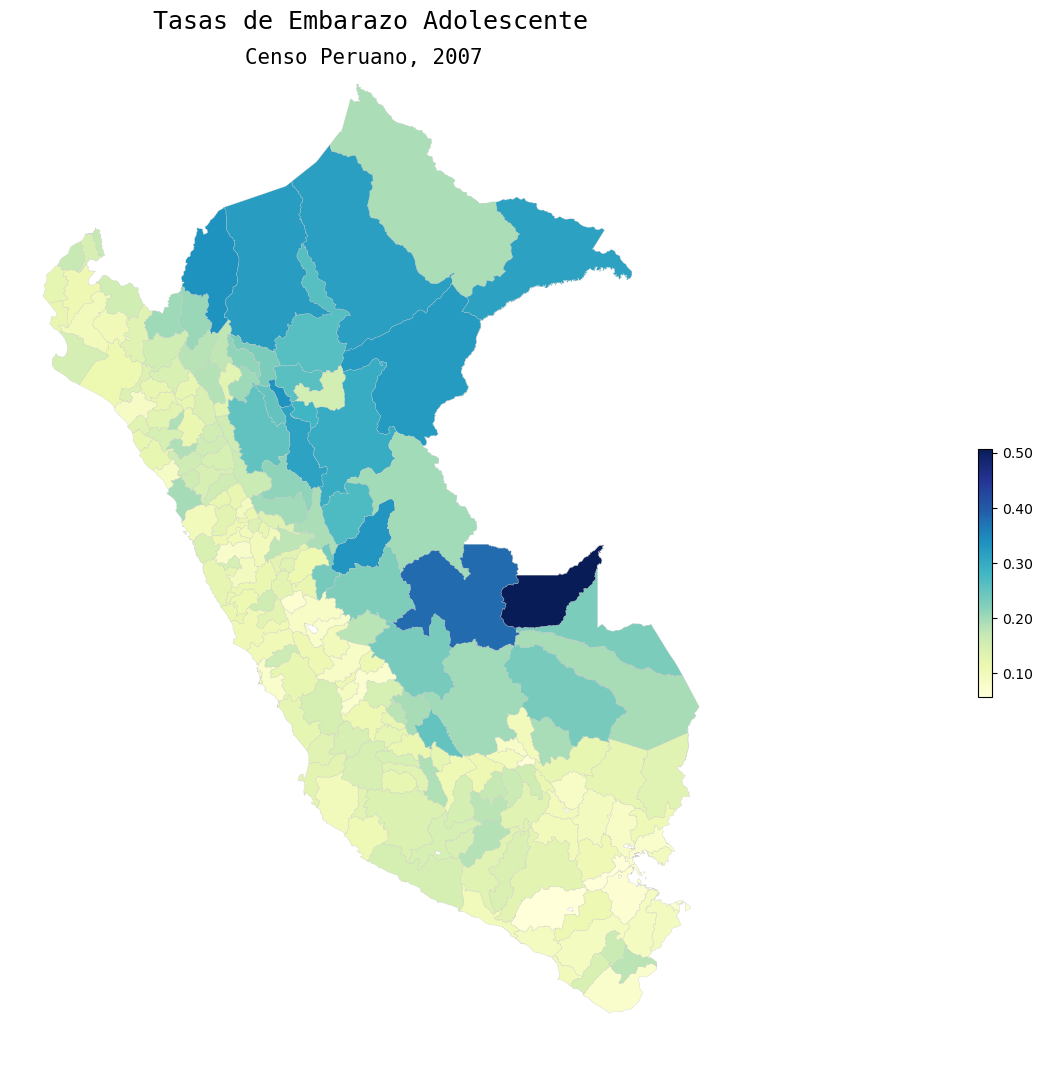

In [39]:
# for insta: cmap= 'RdPu' o 'RdPu_r'
fig, ax = plt.subplots(1, figsize=(13.50, 10.80))

subset_4326.plot(column='W_share', cmap='YlGnBu', linewidth=0.2, ax=ax, edgecolor='#c8c8c8', legend = False,);
ax.axis('off');

# Now adding the colorbar
mappable = ax.collections[0]
cbaxes = fig.add_axes([0.95, 0.35, 0.01, 0.23]) 
fig.colorbar(mappable,cax = cbaxes, shrink = 0.5, format = '%.2f')

ax.set_title("Tasas de Embarazo Adolescente", fontdict= {'fontsize': '18', 'fontweight': '5', 'fontfamily': 'monospace'}, loc = 'center', );
ax.annotate('Censo Peruano, 2007', xy=(0.49,0.98), xycoords = 'axes fraction', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 15, color = '#000000', fontfamily='monospace');

plt.tight_layout()